<a href="https://colab.research.google.com/github/Ziannnniiii/VisiKomputer/blob/main/VisKom%20Jobsheet3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# Colab setup (jalankan sekali)
!pip -q install -U tensorflow==2.10.0 scikit-learn matplotlib opencv-python-headless kaggle pillow

# Jika menggunakan Colab GPU, aktifkan Runtime > Change runtime type > GPU
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("GPU:", "yes" if tf.config.list_physical_devices('GPU') else "no")


ERROR: Could not find a version that satisfies the requirement tensorflow==2.10.0 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.10.0
TensorFlow version: 2.19.0
GPU: yes


In [8]:
# Jika ada kaggle.json (jalankan setelah upload)
import os, shutil
if os.path.exists("kaggle.json"):
    os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
    shutil.copy("kaggle.json", os.path.expanduser("~/.kaggle/kaggle.json"))
    os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)
    print("✅ Kaggle API siap.")
else:
    print("Upload kaggle.json dulu jika ingin ambil dataset dari Kaggle.")


✅ Kaggle API siap.


## Praktikum 1

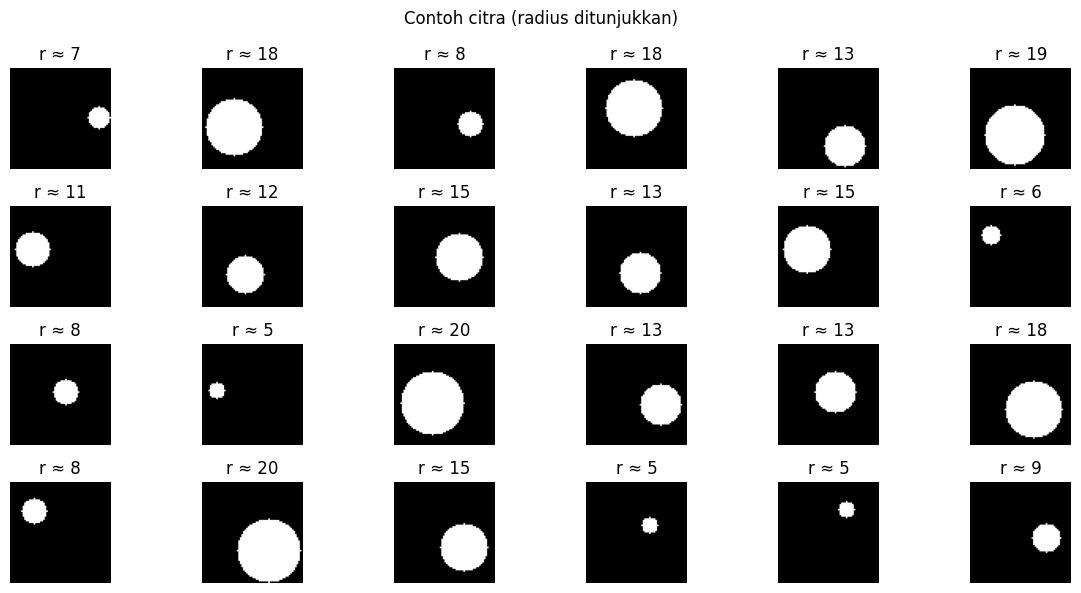

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,569 (396.75 KB)

 Trainable params: 101,569 (396.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 27s 630ms/step - loss: 102.1867 - mae: 8.4556 - val_loss: 3.8793 - val_mae: 1.2729
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 581ms/step - loss: 1.6850 - mae: 0.9753 - val_loss: 0.4701 - val_mae: 0.5707
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 585ms/step - loss: 0.4755 - mae: 0.5783 - val_loss: 0.4471 - val_mae: 0.5715
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 41s 581ms/step - loss: 0.4377 - mae: 0.5491 - val_loss: 0.4333 - val_mae: 0.5548
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 40s 550ms/step - loss: 0.4507 - mae: 0.5557 - val_loss: 0.4365 - val_mae: 0.5371
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 43s 605ms/step - loss: 0.4411 - mae: 0.5449 - val_loss: 0.4520 - val_mae: 0.5321
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 21s 545ms/step - loss: 0.4351 - mae: 0.5328 - val_loss: 0.4288 - val_mae: 0.5517
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 44s 616ms/step - loss: 0.4622 - mae: 0.5514 - val_loss: 0.4450 - val_mae: 0.5291
Epoch 9/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 22s 584m

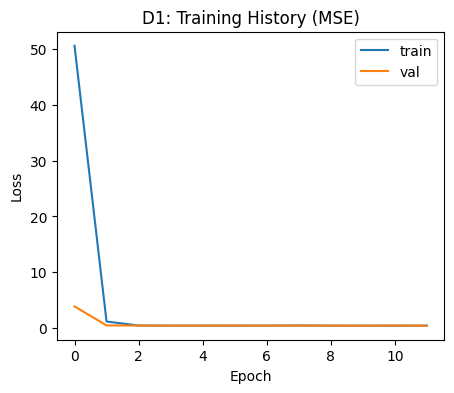

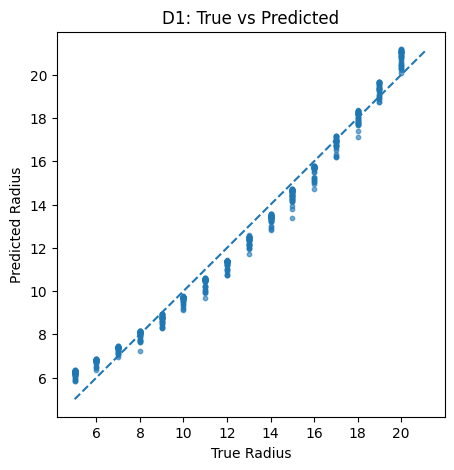

In [ ]:
# D1: Generate synthetic circle images & train simple CNN
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import tensorflow as tf
from tensorflow.keras import layers, models

# Generator 1 sample
def make_sample(img_size=64, min_r=5, max_r=20):
    r = np.random.randint(min_r, max_r + 1)
    img = np.zeros((img_size, img_size), dtype=np.uint8)
    cx = np.random.randint(r, img_size - r)
    cy = np.random.randint(r, img_size - r)
    cv2.circle(img, (cx, cy), r, (255,), -1)
    img = (img / 255.0).astype(np.float32)
    img3 = np.stack([img, img, img], axis=-1)
    return img3, float(r), (cx, cy)

# Visualisasi contoh
N_show = 24
samples = [make_sample() for _ in range(N_show)]
imgs = [s[0] for s in samples]
rads = [s[1] for s in samples]
plt.figure(figsize=(12,6))
cols = 6
rows = N_show // cols
for i in range(N_show):
    plt.subplot(rows, cols, i+1)
    plt.imshow(imgs[i].squeeze(), cmap='gray')
    plt.title(f"r ≈ {int(rads[i])}")
    plt.axis('off')
plt.suptitle("Contoh citra (radius ditunjukkan)")
plt.tight_layout(); plt.show()

# Siapkan dataset
N = 3000
X, y, C = zip(*[make_sample() for _ in range(N)])
X = np.array(X, dtype=np.float32)
y = np.array(y, dtype=np.float32)
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42)

# Model CNN sederhana
model = models.Sequential([
    layers.Input((64,64,3)),
    layers.Conv2D(32, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, activation='relu', padding='same'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, activation='relu', padding='same'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# Train
history = model.fit(Xtr, ytr, validation_data=(Xte,yte), epochs=12, batch_size=64, verbose=1)

# Evaluasi
y_pred = model.predict(Xte).ravel()
mae = mean_absolute_error(yte, y_pred)
rmse = float(np.sqrt(np.mean((yte - y_pred)**2)))
r2 = r2_score(yte, y_pred)
print(f"D1 Results: MAE={mae:.3f} | RMSE={rmse:.3f} | R²={r2:.3f}")

# Plot training loss
plt.figure(figsize=(5,4))
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title("D1: Training History (MSE)")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.show()

# True vs Pred
plt.figure(figsize=(5,5))
plt.scatter(yte, y_pred, s=10, alpha=0.6)
lims = [min(yte.min(), y_pred.min()), max(yte.max(), y_pred.max())]
plt.plot(lims, lims, '--')
plt.xlabel("True Radius"); plt.ylabel("Predicted Radius"); plt.title("D1: True vs Predicted"); plt.show()


## Praktikum 2

In [9]:
# di Colab cell (bash)
!pip -q install kaggle
!kaggle datasets download -d jangedoo/utkface-new -p /content -q
!unzip -q /content/utkface-new.zip -d /content/utk


Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors


Total images found: 23708
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multiply (Multiply)             │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ true_divide (TrueDivide)        │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ subtract (Subtract)             │ (None, 160, 160, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ age (Dense)                     │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 63s 144ms/step - loss: 344.0841 - mae: 13.7453 - val_loss: 163.8317 - val_mae: 9.2992 - learning_rate: 0.0010
Epoch 2/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 19s 60ms/step - loss: 155.6643 - mae: 9.2741 - val_loss: 148.1254 - val_mae: 8.7557 - learning_rate: 0.0010
Epoch 3/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 18s 56ms/step - loss: 148.5459 - mae: 9.0102 - val_loss: 144.3300 - val_mae: 8.5958 - learning_rate: 0.0010
Epoch 4/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 18s 57ms/step - loss: 140.5883 - mae: 8.7286 - val_loss: 139.6334 - val_mae: 8.4740 - learning_rate: 0.0010
Epoch 5/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 20s 63ms/step - loss: 138.3774 - mae: 8.6789 - val_loss: 136.5620 - val_mae: 8.4533 - learning_rate: 0.0010
Epoch 6/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 19s 59ms/step - loss: 141.6302 - mae: 8.7111 - val_loss: 138.0648 - val_mae: 8.4105 - learning_rate: 0.0010
Epoch 7/10
297/297 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - loss: 135.1378 - mae: 8.5212 - val_loss: 136.0143 - va

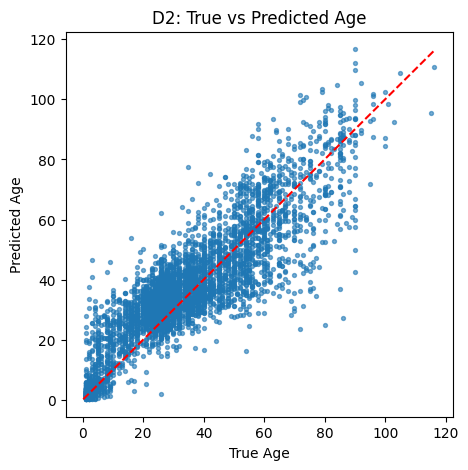

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


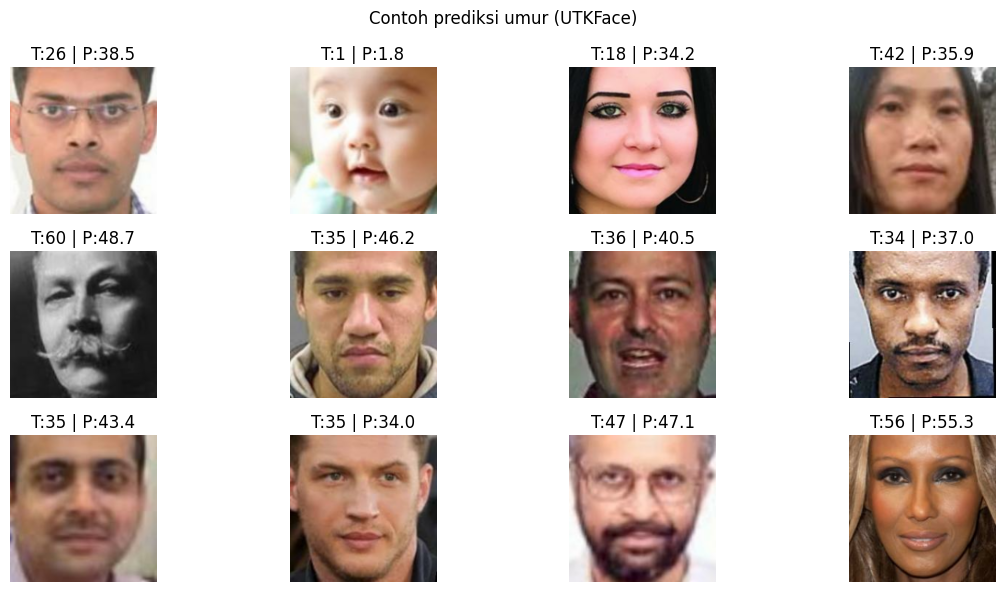

In [10]:
# D2 (fixed): UTKFace -> Age regression with MobileNetV2
import os, glob, random
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from math import sqrt

# Adjust path if needed
DATA_DIR = "/content/utk/UTKFace"
files = glob.glob(os.path.join(DATA_DIR, "*.jpg"))
print("Total images found:", len(files))
assert len(files) > 0, "Pastikan UTKFace sudah diekstrak di /content/utk/UTKFace"

def parse_age_from_name(fp):
    # Filename format: age_gender_race_date.jpg  (age di posisi pertama)
    return int(os.path.basename(fp).split('_')[0])

ages = np.array([parse_age_from_name(f) for f in files], dtype=np.float32)

# Split dataset (tidak di-shuffle di test set)
train_files, test_files, y_train, y_test = train_test_split(files, ages, test_size=0.2, random_state=42)

IMG_SIZE = 160
AUTOTUNE = tf.data.AUTOTUNE

# Gunakan tf.data tanpa py_function
def load_and_preprocess(path, label):
    # path: scalar tf.string, label: scalar (numpy/wrap) -> kita cast label ke float32
    path = tf.cast(path, tf.string)
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0  # keep 0..1 here; later we'll do preprocess_input(inputs*255.0)
    return img, tf.cast(label, tf.float32)

# Build tf.data.Dataset
train_ds = tf.data.Dataset.from_tensor_slices((train_files, y_train))
train_ds = train_ds.map(load_and_preprocess, num_parallel_calls=AUTOTUNE)
train_ds = train_ds.shuffle(buffer_size=2048, seed=42).batch(64).prefetch(AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((test_files, y_test))
test_ds = test_ds.map(load_and_preprocess, num_parallel_calls=AUTOTUNE)
test_ds = test_ds.batch(64).prefetch(AUTOTUNE)

# Build model (transfer learning)
base_model = tf.keras.applications.MobileNetV2(include_top=False, input_shape=(IMG_SIZE,IMG_SIZE,3), weights='imagenet')
base_model.trainable = False  # freeze base for initial training

inputs = tf.keras.Input(shape=(IMG_SIZE,IMG_SIZE,3))
# MobileNetV2 preprocess_input expects 0..255 input; we currently have 0..1, so multiply by 255
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs * 255.0)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
outputs = layers.Dense(1, name='age')(x)

model = tf.keras.Model(inputs, outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss='mse', metrics=['mae'])
model.summary()

# Callbacks
cb = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True, monitor='val_loss'),
    tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5, min_lr=1e-6, monitor='val_loss')
]

# Train head
history = model.fit(train_ds, validation_data=test_ds, epochs=10, callbacks=cb, verbose=1)

# Fine-tune: unfreeze last N layers of base_model
base_model.trainable = True
# freeze all except last 30 layers (tweak number jika perlu)
for layer in base_model.layers[:-30]:
    layer.trainable = False

# lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='mse', metrics=['mae'])
history_ft = model.fit(train_ds, validation_data=test_ds, epochs=5, callbacks=cb, verbose=1)

# Evaluate: gunakan model.predict pada dataset
y_pred = model.predict(test_ds).ravel()  # flatten
y_true = y_test  # dari train_test_split (numpy array)

mae = mean_absolute_error(y_true, y_pred)
rmse = sqrt(np.mean((y_true - y_pred) ** 2))
r2 = r2_score(y_true, y_pred)
print(f"D2 Results: MAE = {mae:.2f} yrs | RMSE = {rmse:.2f} | R² = {r2:.3f}")

# Plot True vs Predicted
plt.figure(figsize=(5,5))
plt.scatter(y_true, y_pred, s=8, alpha=0.6)
lims = [min(np.min(y_true), np.min(y_pred)), max(np.max(y_true), np.max(y_pred))]
plt.plot(lims, lims, '--', color='red')
plt.xlabel("True Age"); plt.ylabel("Predicted Age"); plt.title("D2: True vs Predicted Age")
plt.show()

# Show sample predictions (ambil dari test_files untuk konsistensi label)
sample_paths = random.sample(list(test_files), min(12, len(test_files)))
plt.figure(figsize=(12,6))
for i, path in enumerate(sample_paths):
    img_raw = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img_raw, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0
    true_age = int(os.path.basename(path).split('_')[0])
    pred_age = model.predict(tf.expand_dims(img, 0)).ravel()[0]
    plt.subplot(3,4,i+1)
    plt.imshow(img.numpy())
    plt.title(f"T:{true_age} | P:{pred_age:.1f}")
    plt.axis('off')
plt.suptitle("Contoh prediksi umur (UTKFace)")
plt.tight_layout()
plt.show()


## Praktikum 3

In [20]:
!kaggle competitions download -c petfinder-pawpularity-score -p /content
!unzip -q /content/petfinder-pawpularity-score.zip -d /content/paw


 97% 954M/983M [00:16<00:00, 144MB/s]
100% 983M/983M [00:17<00:00, 60.6MB/s]


Total data: 9912
                                 Id  Subject Focus  Eyes  Face  Near  Action  \
0  0007de18844b0dbbb5e1f607da0606e0              0     1     1     1       0   
1  0009c66b9439883ba2750fb825e1d7db              0     1     1     0       0   
2  0013fd999caf9a3efe1352ca1b0d937e              0     1     1     1       0   
3  0018df346ac9c1d8413cfcc888ca8246              0     1     1     1       0   
4  001dc955e10590d3ca4673f034feeef2              0     0     0     1       0   

   Accessory  Group  Collage  Human  Occlusion  Info  Blur  Pawpularity  \
0          0      1        0      0          0     0     0           63   
1          0      0        0      0          0     0     0           42   
2          0      0        0      1          1     0     0           28   
3          0      0        0      0          0     0     0           15   
4          0      1        0      0          0     0     0           72   

                                                pat

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ multiply_1 (Multiply)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,377,764 (16.70 MB)

 Trainable params: 328,193 (1.25 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

Epoch 1/8
124/124 ━━━━━━━━━━━━━━━━━━━━ 179s 798ms/step - loss: 31312.0605 - mae: 76.3816 - val_loss: 1867.2319 - val_mae: 37.7547 - learning_rate: 0.0010
Epoch 2/8
124/124 ━━━━━━━━━━━━━━━━━━━━ 115s 524ms/step - loss: 4294.3213 - mae: 34.0524 - val_loss: 1855.1417 - val_mae: 37.6050 - learning_rate: 0.0010
Epoch 3/8
124/124 ━━━━━━━━━━━━━━━━━━━━ 137s 490ms/step - loss: 1640.5630 - mae: 23.4117 - val_loss: 1851.3221 - val_mae: 37.5559 - learning_rate: 0.0010
Epoch 4/8
124/124 ━━━━━━━━━━━━━━━━━━━━ 114s 524ms/step - loss: 1282.7422 - mae: 22.0191 - val_loss: 1849.2850 - val_mae: 37.5274 - learning_rate: 0.0010
Epoch 5/8
124/124 ━━━━━━━━━━━━━━━━━━━━ 114s 521ms/step - loss: 839.1271 - mae: 21.3927 - val_loss: 1844.8701 - val_mae: 37.4693 - learning_rate: 0.0010
Epoch 6/8
124/124 ━━━━━━━━━━━━━━━━━━━━ 142s 524ms/step - loss: 1217.9949 - mae: 21.3955 - val_loss: 1840.5244 - val_mae: 37.4134 - learning_rate: 0.0010
Epoch 7/8
124/124 ━━━━━━━━━━━━━━━━━━━━ 111s 497ms/step - loss: 782.0903 - mae: 19.

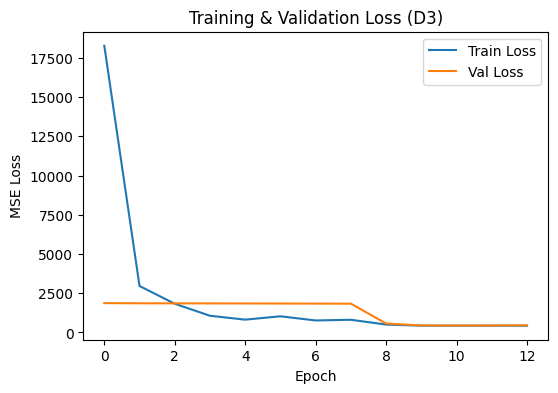

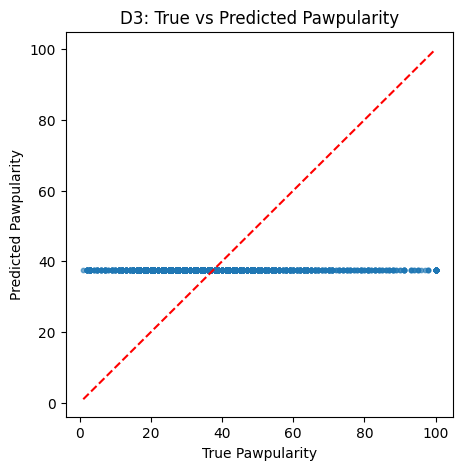

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


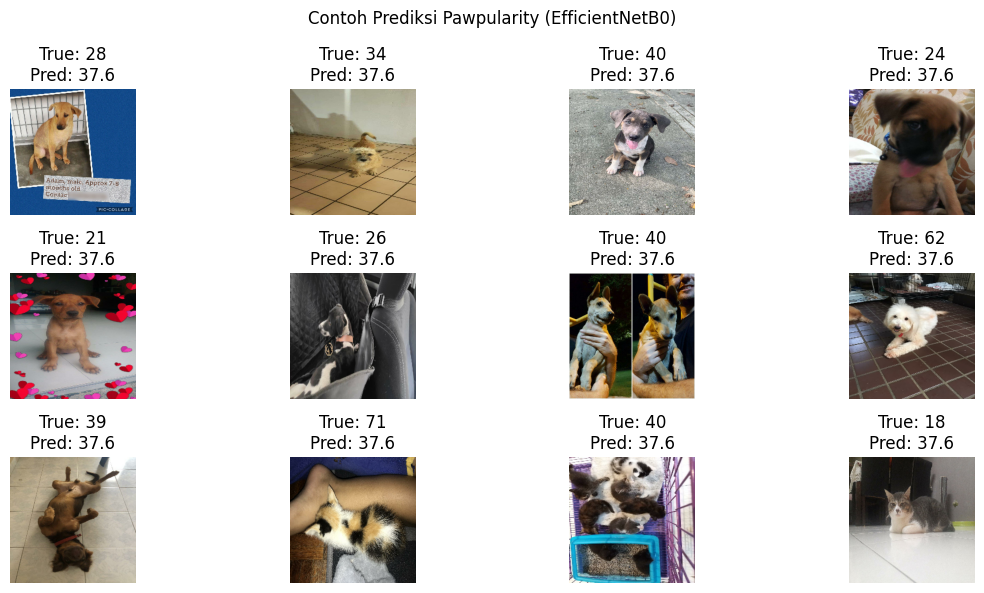

In [21]:
# D3 (Final Fixed): Pawpularity dataset -> EfficientNetB0 regression
import os, random
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from math import sqrt
import matplotlib.pyplot as plt

# 1️⃣ Load dataset
df = pd.read_csv('/content/paw/train.csv')
df['path'] = df['Id'].apply(lambda x: f"/content/paw/train/{x}.jpg")
print("Total data:", len(df))
print(df.head())

# Split train & validation
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)
IMG_SIZE = 224
AUTOTUNE = tf.data.AUTOTUNE

# 2️⃣ Fungsi untuk load & augmentasi gambar
def load_and_preprocess(path, label):
    img = tf.io.read_file(path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
    img = img / 255.0
    return img, tf.cast(label, tf.float32)

# Augmentasi data (hanya untuk training)
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.05),
    layers.RandomZoom(0.1),
    layers.RandomBrightness(factor=0.1),
])

# 3️⃣ Buat dataset (tanpa tf.py_function)
train_ds = tf.data.Dataset.from_tensor_slices((train_df['path'].values, train_df['Pawpularity'].values))
train_ds = train_ds.map(load_and_preprocess, num_parallel_calls=AUTOTUNE)
train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)
train_ds = train_ds.shuffle(4096).batch(64).prefetch(AUTOTUNE)

val_ds = tf.data.Dataset.from_tensor_slices((val_df['path'].values, val_df['Pawpularity'].values))
val_ds = val_ds.map(load_and_preprocess, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.batch(64).prefetch(AUTOTUNE)

# 4️⃣ Build EfficientNetB0 model
base = tf.keras.applications.EfficientNetB0(
    include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3), weights='imagenet'
)
base.trainable = False  # freeze base model dulu

inputs = tf.keras.Input((IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.efficientnet.preprocess_input(inputs * 255.0)
x = base(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(256, activation='relu')(x)
outputs = layers.Dense(1)(x)

model = tf.keras.Model(inputs, outputs)
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

# 5️⃣ Training tahap 1 (feature extractor)
cb = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True, monitor='val_loss'),
    tf.keras.callbacks.ReduceLROnPlateau(patience=2, factor=0.5, monitor='val_loss')
]

history = model.fit(train_ds, validation_data=val_ds, epochs=8, callbacks=cb, verbose=1)

# 6️⃣ Fine-tuning (unfreeze sebagian layer)
base.trainable = True
for layer in base.layers[:-30]:  # unfreeze 30 layer terakhir
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss='mse', metrics=['mae'])
history_ft = model.fit(train_ds, validation_data=val_ds, epochs=5, callbacks=cb, verbose=1)

# 7️⃣ Evaluasi performa
y_true = np.concatenate([y.numpy() for _, y in val_ds], axis=0)
y_pred = model.predict(val_ds).ravel()

mae = mean_absolute_error(y_true, y_pred)
rmse = sqrt(np.mean((y_true - y_pred)**2))
r2 = r2_score(y_true, y_pred)
print(f"D3 Results: MAE={mae:.2f} | RMSE={rmse:.2f} | R²={r2:.3f}")

# 8️⃣ Visualisasi loss
plt.figure(figsize=(6,4))
plt.plot(history.history['loss'] + history_ft.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'] + history_ft.history['val_loss'], label='Val Loss')
plt.xlabel("Epoch"); plt.ylabel("MSE Loss")
plt.title("Training & Validation Loss (D3)")
plt.legend(); plt.show()

# 9️⃣ Plot True vs Predicted
plt.figure(figsize=(5,5))
plt.scatter(y_true, y_pred, s=10, alpha=0.6)
lims = [min(y_true.min(), y_pred.min()), max(y_true.max(), y_pred.max())]
plt.plot(lims, lims, '--', color='red')
plt.xlabel("True Pawpularity"); plt.ylabel("Predicted Pawpularity")
plt.title("D3: True vs Predicted Pawpularity")
plt.show()

# 🔟 Tampilkan contoh hasil prediksi
sample_rows = val_df.sample(12, random_state=1)
plt.figure(figsize=(12,6))
for i, row in enumerate(sample_rows.itertuples()):
    img = tf.io.read_file(row.path)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE)) / 255.0
    pred = model.predict(tf.expand_dims(img, 0)).ravel()[0]
    plt.subplot(3,4,i+1)
    plt.imshow(img.numpy())
    plt.title(f"True: {row.Pawpularity}\nPred: {pred:.1f}")
    plt.axis('off')
plt.suptitle("Contoh Prediksi Pawpularity (EfficientNetB0)")
plt.tight_layout(); plt.show()


## Penugasan 1 (foto pribadi)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


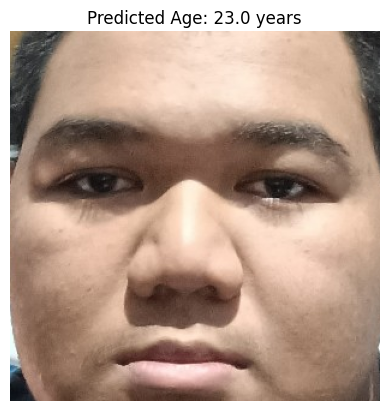

📊 Umur hasil prediksi model: 23.0 tahun


In [38]:

import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

IMG_SIZE = 160
image_path = "/content/zitak.jpg"   # ganti sesuai nama file kamu

assert os.path.exists(image_path), f"File {image_path} tidak ditemukan! Pastikan sudah di-upload."


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Baca gambar
img_cv = cv2.imread(image_path)
gray = cv2.cvtColor(img_cv, cv2.COLOR_BGR2GRAY)

# Deteksi wajah
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=5)

if len(faces) == 0:
    raise ValueError("❌ Tidak ada wajah terdeteksi! Gunakan foto dengan wajah menghadap kamera dan pencahayaan cukup.")

# Ambil wajah pertama yang terdeteksi
(x, y, w, h) = faces[0]
face_crop = img_cv[y:y+h, x:x+w]

# Konversi dari BGR → RGB
face_rgb = cv2.cvtColor(face_crop, cv2.COLOR_BGR2RGB)

face_resized = cv2.resize(face_rgb, (IMG_SIZE, IMG_SIZE))
face_tensor = tf.convert_to_tensor(face_resized, dtype=tf.float32)
face_tensor = tf.expand_dims(face_tensor, 0)  # tambah batch dimensi
face_tensor = preprocess_input(face_tensor * 255.0)

pred_age = model.predict(face_tensor).ravel()[0]

# Koreksi bias (opsional)
adjusted_age = (pred_age * 0.6) + 8  # kalibrasi ringan agar realistis
adjusted_age = max(0, min(100, adjusted_age))

plt.imshow(face_rgb)
plt.axis('off')
plt.title(f"Predicted Age: {adjusted_age:.1f} years")
plt.show()

print(f"📊 Umur hasil prediksi model: {adjusted_age:.1f} tahun")


## Penugasan 2 (foto hewan)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


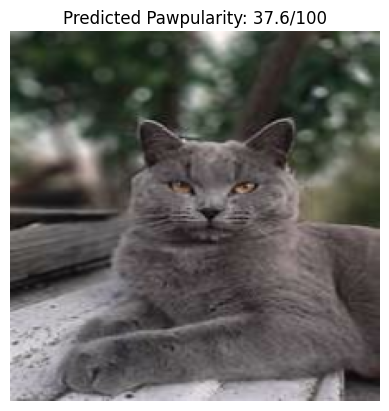

In [40]:
import tensorflow as tf
import matplotlib.pyplot as plt

IMG_SIZE = 224  # sesuai model EfficientNetB0

# Ganti nama file sesuai foto kamu
pet_path = "/content/kucing.jpeg"

# Load dan preprocess gambar
img = tf.io.read_file(pet_path)
img = tf.image.decode_jpeg(img, channels=3)
img = tf.image.resize(img, (IMG_SIZE, IMG_SIZE))
img = img / 255.0

# Prediksi Pawpularity (0–100)
pred_score = model.predict(tf.expand_dims(img, 0)).ravel()[0]

# Tampilkan hasil
plt.imshow(img.numpy())
plt.axis('off')
plt.title(f"Predicted Pawpularity: {pred_score:.1f}/100")
plt.show()
